In [2]:
import csv
import json
import sys
from subprocess import call
import ast
import os
import pandas as pd

In [ ]:
#call("pwd")
#os.chdir('./raphtory-mastodon/mastodon')
#for chunck_df in pd.read_csv('znark.us.csv', chunksize=1[][][]):
    # each chunck_df contains a part of the whole CSV
    #chunck_df

In [ ]:
os.chdir('/var/mastodon')
os.system('ls > /home/pllorente/lista.txt')



In [ ]:
os.chdir('/home/pllorente')
l = open('lista.txt', 'r')
l2 = open('lista4.txt', 'w')
for row in l:
    if("lista" not in row):
        file_size = os.path.getsize(r'/var/mastodon/'+ str(row.replace("\n", "")))
        l2.write(str(row.replace("\n", ""))+', '+str(file_size) + "\n")
l.close()
l2.close()

In [ ]:
os.chdir('/home/pllorente')
l = open('lista.txt', 'r')
l2 = open('lista4.txt', 'w')
for row in l:
    if("lista" not in row):
        file_size = os.system('wc -l /var/mastodon/' + row)
        f22 = os.system('wc -l /home/pllorente/analizar/' + row)
        l2.write(str(row.replace("\n", ""))+', '+str(file_size)+', '+str(f22) + "\n")
l.close()
l2.close()

In [ ]:
os.chdir('/var/mastodon')
os.system('ls > /home/pllorente/lista.txt')
os.chdir('/home/pllorente')
os.system('mkdir grafo')
os.system('mkdir analizar')
os.chdir('analizar')
os.system('ls > /home/pllorente/lista2.txt')
os.chdir('/home/pllorente')
l = open('lista.txt', 'r')
l2 = open('lista2.txt', 'r')
a = []
b= []
#Primera depuración: En lista metemos todos los csvs, para evitar que lea lista.txt, solo metemos los archivos que no contengan la palabra lista en su nombre
for row in l2:
    if ("lista" in row):
        print("")
    else:
        a.append(row.replace("\n", ""))
for row in l:
    row = row.replace("\n", "")
    if(row not in a and "lista" not in row):
        b.append(row)
    else:
        print("")
l.close()
l2.close()
print(len(a))
print(b)

### Trying first to parse one of the files as a dataframe. First processing mentions

In [ ]:

i = []
for nombre in a:
    print(nombre)
    df = pd.read_csv('/var/mastodon/' + nombre, encoding='latin-1')
    c = df.columns
    #Depuración 2: Tras hacer pasadas hemos visto que hay algunos dataframes que no contienen la columna mentions que es la que nos interesa, por lo que haremos un primer corte para evitar errores
    if 'mentions' in c:
        dm = df[df['mentions'] != '[]' ]
        r = pd.DataFrame()
        i = []
        jj= []
        while(i<len(dm['mentions'])):
            #Depuración 3: Muchos de los elementos en mentions, son float por lo que no los acepta ast.literal_eval, hacemos el segundo corte, porque se ha observado que hay strings aleatorios que no concuerdan con el formato que buscamos como 'Web'
            if (isinstance(dm['mentions'].iloc[i], str)):
                if("username" in str(dm['mentions'].iloc[i])):
                    w = ast.literal_eval(dm['mentions'].iloc[i])
                    jj.append(w)
            i = i + 1
        i = []
        r['mentions'] = jj
        #Cambiamos el apartado acct por el servidor del usuario que menciona
        #Uno de los problemas que hemos visto es que una vez creado el dataframe, es que como no estamos creando uno nuevo, se quedan los elementos que no se han parseado correctamente, en vez de crear un dataframe nuevo, compararemos con la longitud del array que hemos usado para hacer append jj
        i = []
        j= []
        while(i<len(jj)):
            g = str(dm['account.acct'].iloc[i])
            u = str(dm['account.username'].iloc[i])
            j.append(g.replace(u+"@", ""))
            dm['account.acct'].iloc[i] = j[i]
            i = i + 1
        l = 0
        f = 0
        while(l<len(jj)):
            if(len(r['mentions'].iloc[l])>f):
                f = len(r['mentions'].iloc[l])
            l = l + 1
        #Ponemos los servidores en mentions
        i = 0
        hh = 0
        p = f
        j= []
        while(hh<p):
            while(i<len(jj)):
                l2 = len(r['mentions'].iloc[i])
                if(l2>hh):
                    g = str(r['mentions'].iloc[i][hh]['acct'])
                    u = str(r['mentions'].iloc[i][hh]['username'])
                    r['mentions'].iloc[i][hh]['acct'] = g.replace(u + "@", "")
                i = i + 1
            hh = hh + 1
            
        res = pd.DataFrame()

        h = 0
        j = 0
        p = f
        m = []
        n = []
        ui = []
        use = []
        da = []
        while(j<p):
            while(h<len(jj)):
                l1 = len(r['mentions'].iloc[h])
                if(l1>j):
                    if(type(r['mentions'].iloc[h][j]) is dict):
                        m.append(r['mentions'].iloc[h][j]['id'])
                        n.append(r['mentions'].iloc[h][j]['acct'])
                        ui.append(dm['account.id'].iloc[h])
                        use.append(dm['account.acct'].iloc[h])
                        da.append(dm['created_at'].iloc[h])
                h = h + 1
            h = 0
            j = j + 1 
        res['Date'] = da
        res['UserId'] = ui
        res['ServerUser'] = use
        res['UserMentioned'] = m
        res['ServerMentioned'] = n
        res.to_csv('./analizar/'+str(nombre))
        #Hacemos los archivos para la carpeta grafo
        if(len(res['ServerUser']) != 0):
            enlace = pd.DataFrame()
            nodo = pd.DataFrame()
            y = []
            w = []
            z = 0
            t = 0
            enlace['source'] = res['ServerUser']
            enlace['target'] = res['ServerMentioned']
            enlace.to_csv('./grafo/enlace'+str(nombre))
            
            servidores = enlace['source'].unique()
            servidoress = enlace['target'].unique()
            servidores = servidores.tolist()
            num = []
            serv = []
            for t in servidoress:
                if not t in servidores:
                    servidores.append(t)
            y = 0
            while(y<len(servidores)):
                num.append(y)
                serv.append(servidores[y])
                y = y + 1
            nodo['Id'] = num
            nodo['Label'] = serv

            nodo.to_csv('./grafo/nodo'+str(nombre))
    else:
        b.pop(i)
    i = i + 1


#Una de las decisiones tomadas es en vez de estar creando una columna para cada uno de los usuarios mencionados, se juntan todas las menciones en una única columna.

In [ ]:
#Comprueba si hay repetidosw
r = pd.read_csv('/home/pllorente/resultado/resultadoanalizar.csv')
i = 0
contador = 0
h = []
j = 1

while(j<(len(r)-1)):
    while(i<len(r)):
        if(i != j):
            if (r.iloc[j]['Date'] == r.iloc[i]['Date'] and r.iloc[j]['ServerMentioned'] == r.iloc[i]['ServerMentioned'] and r.iloc[j]['ServerUser'] == r.iloc[i]['ServerUser'] and r.iloc[j]['UserId'] == r.iloc[i]['UserId'] and r.iloc[j]['UserMentioned'] == r.iloc[i]['UserMentioned']):
                print('Iguales')
                contador = contador + 1
                h.append([i,j])
            print(i)
        i = i + 1
    i = j
    j = j + 1
    

    




In [ ]:
iny = 0
os.system('mkdir algo')
os.chdir('algo')
for chunck_df in pd.read_csv('/var/mastodon/soc.canned-death.us.csv', chunksize=1000):
    nombre = 'soc.canned-death.us' + str(iny) + '.csv'
    df = chunck_df
    dm = df[df.mentions != '[]' ]
    i = 0
    jj= []
    print(ast.literal_eval(str(dm['mentions'].iloc[0]))[0])
    while(i<len(dm['mentions'])):
        if(type(dm['mentions'].iloc[i]) is str):
            jj.append(ast.literal_eval(dm['mentions'].iloc[i]))
        i = i + 1
    i = 0
    while(i<len(j)):
        dm['mentions'].iloc[i] = j[i]
        i = i + 1
    men = dm['mentions']
    date = dm['created_at']
    user = dm['account.acct']
    us = dm['account.username']
    #Cambiamos el apartado acct por el servidor del usuario que menciona
    i = 0
    j= []
    while(i<len(user)):
        g = str(dm['account.acct'].iloc[i])
        u = str(dm['account.username'].iloc[i])
        j.append(g.replace(u+"@", ""))
        dm['account.acct'].iloc[i] = j[i]
        i = i + 1
    l = 0
    f = 0
    while(l<len(jj)):
        if(len(dm['mentions'].iloc[l])>f):
            f = len(dm['mentions'].iloc[l])
        l = l + 1
    #Ponemos los servidores en mentions
    i = 0
    j= []
    hh = 0
    p = f
    while(hh<p):
        while(i<len(jj)):
            l2 = len(dm['mentions'].iloc[i])
            print(i)
            if(l2>hh):
                g = str(dm['mentions'].iloc[i][hh]['acct'])
                u = str(dm['mentions'].iloc[i][hh]['username'])
                dm['mentions'].iloc[i][hh]['acct'] = g.replace(u + "@", "")
            i = i + 1
        hh = hh + 1
        
    res = pd.DataFrame()
    res['Date'] = dm['created_at']
    res['UserId'] = dm['account.id']
    res['ServerUser'] = dm['account.acct']

    h = 0
    j = 0
    p = f
    m = []
    n = []
    while(j<p):
        while(h<len(jj)):
            l1 = len(dm['mentions'].iloc[h])
            if(l1>j):
                m.append(dm['mentions'].iloc[h][j]['id'])
                n.append(dm['mentions'].iloc[h][j]['acct'])
            else:
                m.append(-1)
                n.append(-1)
            h = h + 1
        g = 'UserMentioned' + str(j)
        i = 'ServerMentioned' + str(j)
        h = 0
        res[g] = m
        res[i] = n
        m = []
        n = []
        j = j + 1  
    res.to_csv('./analizar/'+ nombre)
    #Hacemos los archivos para la carpeta grafo
    if(len(res['ServerUser']) != 0):
        enlace = pd.DataFrame()
        nodo = pd.DataFrame()
        y = []
        w = []
        z = 0
        t = 0

        while(z<p):
            s = 'ServerMentioned' + str(z)
            while(t<len(res[s])):
                if (res[s].iloc[t] != -1):
                    w.append(res['ServerUser'].iloc[t])
                    y.append(res[s].iloc[t])
                t = t + 1
            z = z + 1
        enlace['source'] = pd.concat(w, axis= 0)
        enlace['target'] = pd.concat(y, axis= 0)

        servidores = enlace['source'].unique()
        servidoress = enlace['target'].unique()
        servidores = servidores.tolist()
        num = []
        serv = []
        for t in servidoress:
            if not t in servidores:
                servidores.append(t)
        y = 0
        while(y<len(servidores)):
            num.append(y)
            serv.append(servidores[y].iloc[y])
            y = y + 1
        nodo['Id'] = num
        nodo['Label'] = serv
        enlace.to_csv('./grafo/enlace'+str(nombre))
        nodo.to_csv('./grafo/nodo'+str(nombre))
        iny = iny + 1

In [ ]:

os.system('ls > lista.txt')
l = open('lista.txt', 'r')
a = []
for row in l:
    if ("lista" in row):
        print("")
    else:
        a.append(row.replace("\n", ""))
        
l.close()
res = pd.DataFrame()
bf = []
uf = []
dff = []
sf = []
vf = []
for x in a:
    print(x)
    df = pd.read_csv(str(x))
    i = 0
    y = 0
    while(y < len(df['ServerUser'])):
        print(y)
        dff.append(df['Date'].iloc[y])
        sf.append(df['ServerUser'].iloc[y])
        vf.append(df['UserId'].iloc[y])
        bf.append(df['ServerMentioned'].iloc[y])
        uf.append(df['UserMentioned'].iloc[y])
        y = y + 1

res['Date'] = dff
res['UserId'] = vf
res['ServerUser'] = sf    
res['UserMentioned'] = uf
res['ServerMentioned'] = bf
res.to_csv('../resultado/resultadoanalizar.csv')






In [ ]:
os.chdir('/home/pllorente')
os.chdir('grafo')
os.system('ls > lista.txt')
l = open('lista.txt', 'r')
a = []
b = []
for row in l:
    if ("enlace" in row):
        b.append(row.replace("\n", ""))
    elif ("lista" in row):
        print("")
    else:
        a.append(row.replace("\n", ""))
l.close()
nodo = pd.DataFrame()
i = 0
ni = []
nl = []
for d in a:
    f = pd.read_csv(str(d))
    while(i < len(f)):
        ni.append(f['Id'].iloc[i])
        nl.append(f['Label'].iloc[i])
        i = i + 1
nodo['Id'] = ni
nodo['Label'] = nl
nodo.to_csv('/home/pllorente/resultado/resultadonodo.csv')

In [ ]:
os.chdir('/home/pllorente')
os.chdir('grafo')
enlace = pd.DataFrame()

n = pd.read_csv('/home/pllorente/resultado/resultadoanalizar.csv')

enlace['source'] = n['ServerUser']
enlace['target'] = n['ServerMentioned']

enlace.to_csv('/home/pllorente/resultado/resultadoenlace.csv')


enlace2 = pd.DataFrame()
enlace2['Date'] = n['Date']
enlace2['source'] = n['ServerUser']
enlace2['target'] = n['ServerMentioned']

enlace2.to_csv('/home/pllorente/resultado/resultadoenlacedinamico.csv')

In [3]:

x = pd.read_csv('/home/pllorente/resultado/resultadoanalizar.csv')



/tmp/ipykernel_225441/2297720155.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  x = pd.read_csv('/home/pllorente/resultado/resultadoanalizar.csv')


In [ ]:
s = 3824367+3277738+2961351+2945066+2742578+2099004+2063482+1939754+1883395
t = 192628+92594+15122+130535+142108+108175+20924+108765+102806

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(7,5))
x = ["0", ">1"]
y = [s, t]

ax.bar(x,y)
# Set a title
ax.set_title("Numero de mensajes con o sin mencion")

# Set axes labels
ax.set_xlabel("Numero de menciones")
ax.set_ylabel("Numero de mensajes")

plt.show(fig)

In [ ]:
#Lista de los servidores con los que trabajamos
serveru = x['ServerUser'].unique()
serverm = x['ServerMentioned'].unique()
print(serveru)
print(serverm)

In [ ]:
usernum = x['UserId'].unique()
userm = x['UserMentioned'].unique()
longitud = len(x)

In [43]:
#Fecha de inicio y fin
i = 0
d = []
y = pd.DataFrame()
for z in x['Date']:
    if('201' in str(z)):
        d.append(str(z)[0:19])
y["Date"] = d
y["Date"] = pd.to_datetime(y["Date"], format="%Y-%m-%d"+'T'+"%H:%M:%S")
y = y.sort_values(by='Date')
año = y['Date']
inicio = año.iloc[0]
fin = año.iloc[len(año)-1]
print('inicio:'+str(inicio))
print('fin:'+str(fin))


inicio:2014-05-19 17:02:59
fin:2018-05-28 09:56:48


Text(0.5, 0, 'Numero menciones')

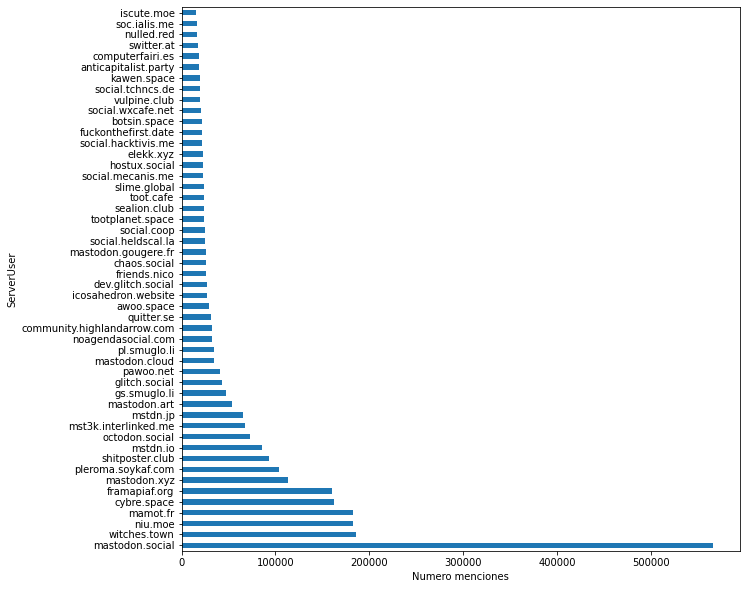

In [18]:
#Ranking Servidores
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
serv = x.groupby(['ServerUser']).count().sort_values('Date', ascending  = False)['Date'][:50]
serv.plot(figsize = (10,10), kind='barh')
plt.xlabel('Numero menciones')

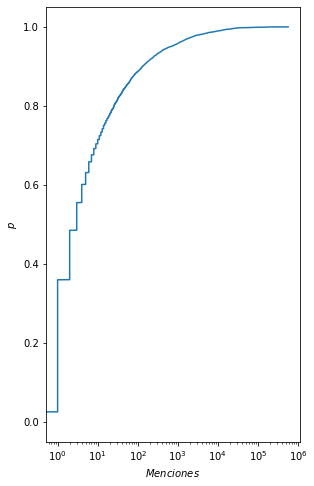

In [6]:
#Ranking Usuarios
serv = x.groupby(['ServerUser']).count().sort_values('Date', ascending  = False)['Date']
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# sort the data:
data_sorted = np.sort(serv)

# calculate the proportional values of samples
p = 1. * np.arange(len(serv)) / (len(serv) - 1)

# plot the sorted data:
fig = plt.figure()
ax2 = fig.add_subplot(122)
plt.rcParams["figure.figsize"] = (10,8)
ax2.plot(data_sorted, p)
ax2.set_xlabel('$Menciones$')
ax2.set_ylabel('$p$')
plt.xscale('log')

ConversionError: Failed to convert value(s) to axis units: ['ServerUser', 'ServerMentioned']

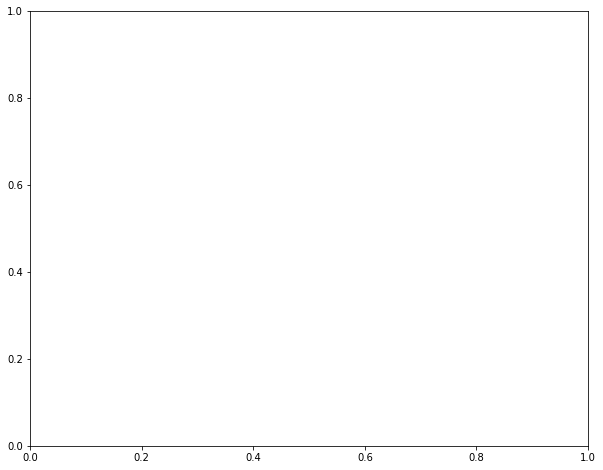

In [17]:
serv = x.groupby(['ServerUser']).count().sort_values('Date', ascending  = False)['Date'][:50]
serv1 = x.groupby(['ServerMentioned']).count().sort_values('Date', ascending  = False)['Date'][:50]
data = [serv,serv1]
plt.xtickl(['ServerUser', 'ServerMentioned'])
plt.ylabel('Mentions')
plt.boxplot(data)

Text(0.5, 0, 'Numero menciones')

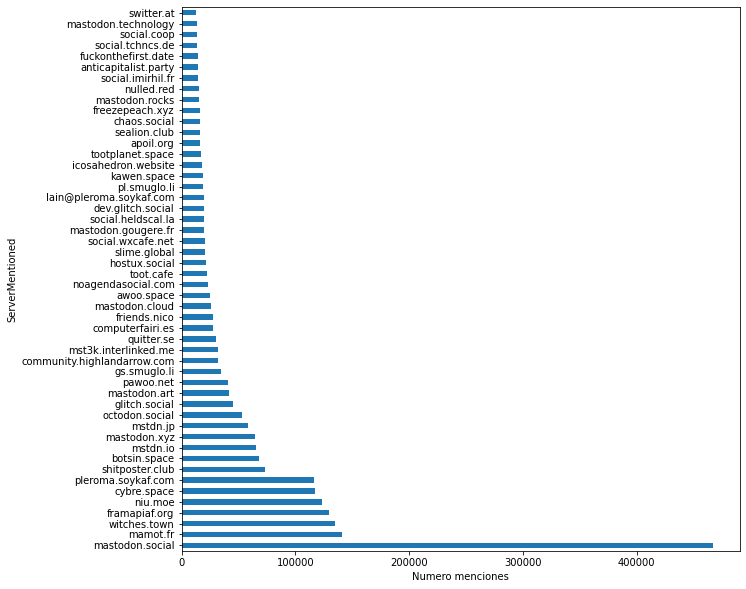

In [19]:
#Ranking Servidores Mencionados
serv1 = x.groupby(['ServerMentioned']).count().sort_values('Date', ascending  = False)['Date'][:50]
serv1.plot(figsize = (10,10), kind='barh')
plt.xlabel('Numero menciones')

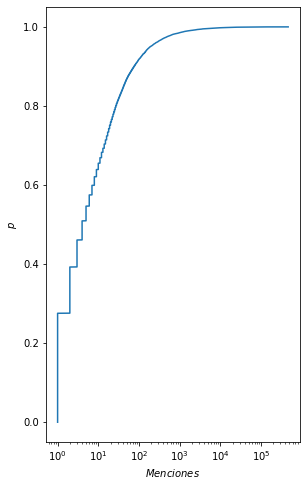

In [5]:
#Ranking Usuarios
serv = x.groupby(['ServerMentioned']).count().sort_values('Date', ascending  = False)['Date']
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# sort the data:
data_sorted = np.sort(serv)

# calculate the proportional values of samples
p = 1. * np.arange(len(serv)) / (len(serv) - 1)

# plot the sorted data:
fig = plt.figure()
ax2 = fig.add_subplot(122)
plt.rcParams["figure.figsize"] = (10,8)
ax2.plot(data_sorted, p)
ax2.set_xlabel('$Menciones$')
ax2.set_ylabel('$p$')
plt.xscale('log')

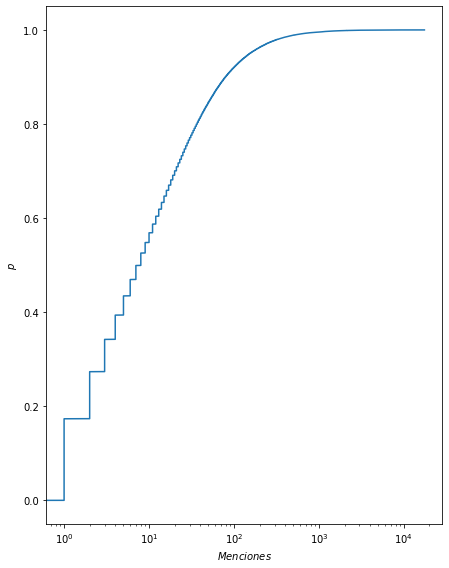

In [42]:
#Ranking Usuarios
serv = x.groupby(['UserId']).count().sort_values('Date', ascending  = False)['Date']
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# sort the data:
data_sorted = np.sort(serv)

# calculate the proportional values of samples
p = 1. * np.arange(len(serv)) / (len(serv) - 1)

# plot the sorted data:
fig = plt.figure()
ax2 = fig.add_subplot(122)
plt.rcParams["figure.figsize"] = (10,8)
ax2.plot(data_sorted, p)
ax2.set_xlabel('$Menciones$')
ax2.set_ylabel('$p$')
plt.xscale('log')

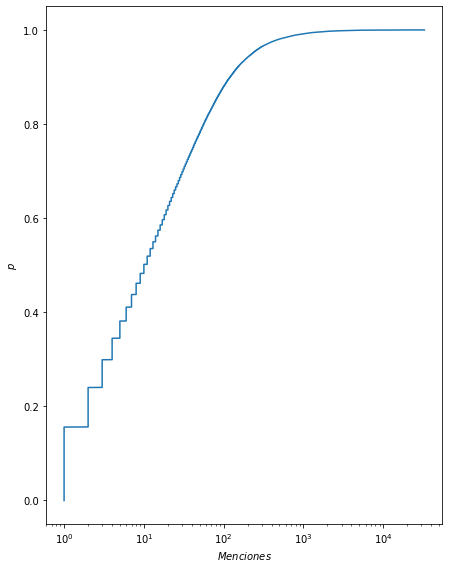

In [39]:
#Ranking Usuarios Mencionados
serv1 = x.groupby(['UserMentioned']).count().sort_values('Date', ascending  = False)['Date']
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# sort the data:
data_sorted = np.sort(serv1)

# calculate the proportional values of samples
p = 1. * np.arange(len(serv1)) / (len(serv1) - 1)

# plot the sorted data:
fig = plt.figure()
ax2 = fig.add_subplot(122)
plt.rcParams["figure.figsize"] = (20,20)
ax2.plot(data_sorted, p)
ax2.set_xlabel('$Menciones$')
ax2.set_ylabel('$p$')
plt.xscale('log')

In [ ]:
u = pd.read_csv('/home/pllorente/resultado/resultadoenlace.csv')
h = pd.DataFrame()
h['Source'] = u['source']
h['Target'] = u['target']
w = h.groupby(['Source', 'Target']).size()
print(w)
w.to_csv('/home/pllorente/resultado/enlacerepresentar.csv')

Text(0, 0.5, 'Menciones')

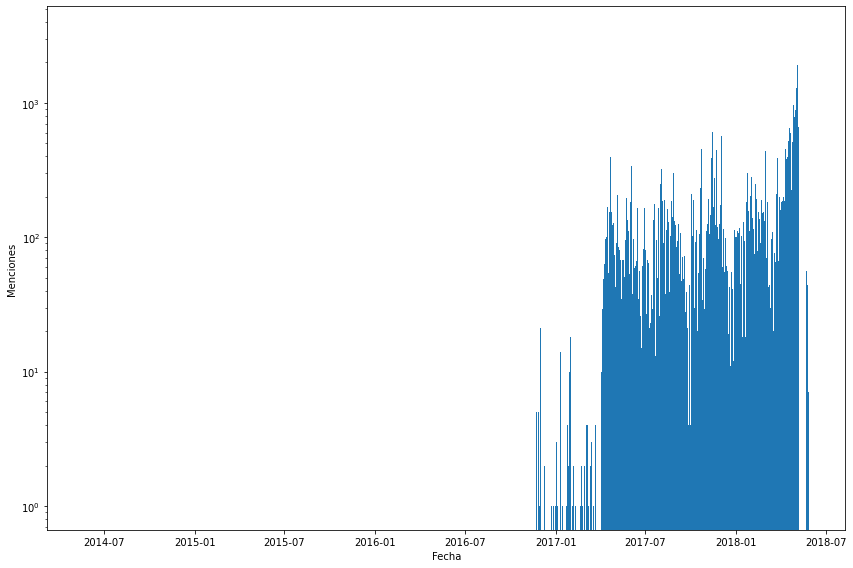

In [49]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (12, 8)
plt.hist(año, bins=100000)
plt.yscale('log')
plt.xlabel('Fecha')
plt.ylabel('Menciones')

In [ ]:
t = pd.read_csv('/home/pllorente/dat.csv')
dia = pd.DataFrame()
d = []
dd = []
i = 0
print('listo')
for w in t[' window']:
    if('201' in str(t['date'].iloc[i])):
        print('algo')
        if(str(w)=='86400000'):
            d.append(t['date'].iloc[i])
            dd.append(t[' degree '].iloc[i])
    i = i + 1
print('listo')
dia['date'] = d
dia[' degree '] = dd
dia.to_csv('degdia.csv')

In [ ]:
t = pd.read_csv('degmes.csv')
print(t['degree'].mean())



In [ ]:
hora = pd.DataFrame()
semana = pd.DataFrame()
mes = pd.DataFrame()
año = pd.DataFrame()
h = []
hd = []
s = []
sd = []
m = []
md = []
a = []
ad = []
i = 0
print('listo')
for w in h[' window']:
    if(str(w)=='3600000'):
        h.append(t['date'].iloc[i])
        hd.append(t[' degree '].iloc[i])
    if(str(w)=='604800000'):
        s.append(t['date'].iloc[i])
        sd.append(t[' degree '].iloc[i])
    if(str(w)=='2628000000'):
        s.append(t['date'].iloc[i])
        sd.append(t[' degree '].iloc[i])
    if(str(w)=='31536000000'):
        s.append(t['date'].iloc[i])
        sd.append(t[' degree '].iloc[i])
    i = i + 1
print('listo')
hora['date'] = h
hora['degree'] = hd
semana['date'] = s
semana['degree'] = sd
mes['date'] = m
mes['degree'] = md
año['date'] = a
año['degree'] = ad
hora.to_csv('deghora.csv')
semana.to_csv('degsemana.csv')
mes.to_csv('degmes.csv')
año.to_csv('degaño.csv')


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (6,6)
plt.hist(h['date'], bins=100)


In [ ]:
print(i)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('dat.csv')
data["date"] = pd.to_datetime(data["Date"], unit='ms')
data = data.sort_values(by='Date')

plt.rcParams["figure.figsize"] = (12,8)
plt.hist(data['date'], bins=10000)
plt.savefig('dat.png')

In [4]:
t = pd.read_csv('enlacerepresentar1.csv')
print(t)
y = t['Source']
print('mastodon.social' in y)
u = 0
l = open('listass.txt', 'r')
j = pd.DataFrame()
k = pd.DataFrame()
w = []
e = []
h = []
for row in l:
    j = t[y.str.contains('social.tchncs.de|social.infranix.eu|www.mstddntfdn.online|social.targaryen.house|soc.ialis.me|social.coop|vmrpc.net|tweets|social.wxcafe.net|social.nasqueron.org')]
    k = t[t['Target'].str.contains('social.tchncs.de|social.infranix.eu|www.mstddntfdn.online|social.targaryen.house|soc.ialis.me|social.coop|vmrpc.net|tweets|social.wxcafe.net|social.nasqueron.org')]
j.to_csv('ress2.csv')
k.to_csv('ress3.csv')

                Source           Target  Weight
0                    0                0       1
1          00Something             abgd       2
2          00Something  mastodon.social       2
3          00Something             noam       1
4          00Something             yair       3
...                ...              ...     ...
145445          zvirra           zvirra       2
145446            zyun         mstdn.jp       2
145447            zyun             zyun       1
145448  ä¸¼.upsilo.net   ä¸¼.upsilo.net       1
145449         ð¾â®   oldbytes.space       1

[145450 rows x 3 columns]
False


In [8]:
b = pd.read_csv('ress2.csv')
g = open('lista.txt', 'r')
h = []
j = pd.DataFrame()
q = ''
for row in g:
    w = row.replace("\n", "")
    w = w.replace(".csv", "")
    q = q + '|' + w
    h.append(w)
j = b[b['Target'].str.contains(str(q))]
i = 0
o = []
oo = []
ooo = []
ñ = 0
for v in j['Target']:
    while(i< len(h)):
        if(str(h[i]) in v):
            o.append(str(h[i]))
            oo.append(b['Source'].iloc[ñ])
            ooo.append(b['Weight'].iloc[ñ])
        i = i + 1
    i = 0
    ñ = ñ + 1
print(len(o))
print(len(oo))
print(len(ooo))
s = pd.DataFrame()
s['Source'] = oo
s['Target'] = o
s['Weight'] =ooo
s.to_csv('ress4.csv')


    

702
702
702


In [32]:
f = pd.read_csv('deghorac.csv')
g = f.groupby(['date','CCL'], as_index=False).count()
print(g)

                  date    CCL  Unnamed: 0  userid
0        1482404531000     43           2       2
1        1482408131000     13           4       4
2        1482415331000     13           2       2
3        1482418931000     94           2       2
4        1482422531000     50           2       2
...                ...    ...         ...     ...
1839775  1525719731000  14675           2       2
1839776  1525723247000   1053           2       2
1839777  1525723247000  12471           2       2
1839778  1525723247000  14842           2       2
1839779  1525723247000  17746           2       2

[1839780 rows x 4 columns]


In [43]:
f = pd.read_csv('degdiac.csv')
g = f.groupby(['date','CCL'], as_index=False).count()
h = f.groupby(['date'], as_index=False).count()
rr = g[g['date'] == h['date'].iloc[0]]
print(rr['userid'].max()/h['CCL'].iloc[0])

0.3103448275862069
